In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
amazon_df = pd.read_fwf('amazon_cells_labelled.txt', delimiter= '\t', header=None)
amazon_df.to_csv('amazon.csv')


In [19]:
amazon_df.columns = ['comment']

In [21]:
keywords = ['love', 'excellent', 'good', 'best', 'satisfied', 'great', 'amazing']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_df[str(key)] = amazon_df.comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

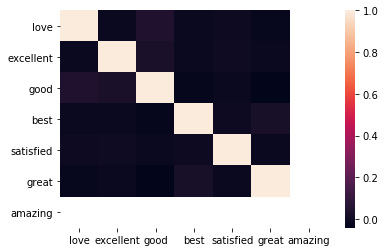

In [22]:
sns.heatmap(amazon_df.corr())

In [24]:
data = amazon_df[keywords]
target = amazon_df['comment']

In [25]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 994
